In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
art_facilities_index = pd.read_csv('/content/busan_arts_facilities_calculate.csv')
art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_people,art_people
0,강서구,6,97.557803,1,38.4,41.625,33.9375
1,금정구,29,268.344591,7,38.4,41.625,33.9375
2,기장군,22,286.260784,2,38.4,41.625,33.9375
3,남구,22,186.723929,18,38.4,41.625,33.9375
4,동구,17,366.679608,5,38.4,41.625,33.9375
5,동래구,13,112.342073,6,38.4,41.625,33.9375
6,부산진구,31,178.825864,4,38.4,41.625,33.9375
7,북구,13,105.420221,3,38.4,41.625,33.9375
8,사상구,13,131.817767,2,38.4,41.625,33.9375
9,사하구,15,107.446778,2,38.4,41.625,33.9375


In [4]:
data = {
    '구': ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
}

final_art_facilities_index = pd.DataFrame(data)
final_art_facilities_index

,구
0,강서구
1,금정구
2,기장군
3,남구
4,동구
5,동래구
6,부산진구
7,북구
8,사상구
9,사하구


In [5]:
cal_df = pd.DataFrame(data)
cal_df

,구
0,강서구
1,금정구
2,기장군
3,남구
4,동구
5,동래구
6,부산진구
7,북구
8,사상구
9,사하구


In [6]:
fac_num_mean = art_facilities_index.cul_fac_num.mean()
mil_fac_num_mean = art_facilities_index.mil_fac_num.mean()
hall_num_mean = art_facilities_index.hall_num.mean()
hall_rate_mean = art_facilities_index.hall_rate.mean()
hall_people_mean = art_facilities_index.hall_people.mean()
art_people_mean = art_facilities_index.art_people.mean()

In [7]:
# 시설지수 계산
cal_df['cul_fac_num'] = (art_facilities_index['cul_fac_num']/fac_num_mean)*100
cal_df['mil_fac_num'] = (art_facilities_index['mil_fac_num']/mil_fac_num_mean)*100
cal_df['hall_num'] = (art_facilities_index['hall_num']/hall_num_mean)*100
cal_df['hall_rate'] = (art_facilities_index['hall_rate']/hall_rate_mean)*100
cal_df['hall_num_rate'] = (cal_df['hall_num'] + cal_df['hall_rate'])/2

In [8]:
final_art_facilities_index['cul_fac_num'] = cal_df['cul_fac_num']
final_art_facilities_index['mil_fac_num'] = cal_df['mil_fac_num']
final_art_facilities_index['hall_num'] = cal_df['hall_num']
final_art_facilities_index['hall_rate'] = cal_df['hall_rate']
final_art_facilities_index['hall_num_rate'] = cal_df['hall_num_rate']

In [9]:
final_art_facilities_index['facilities_index'] = (cal_df['cul_fac_num'] + cal_df['mil_fac_num']+ cal_df['hall_num_rate'])/3
final_art_facilities_index['facilities_index'] = final_art_facilities_index['facilities_index'].round(2)
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,facilities_index
0,강서구,23.821340,30.764664,21.052632,100.0,60.526316,38.37
1,금정구,115.136476,84.621946,147.368421,100.0,123.684211,107.81
2,기장군,87.344913,90.271782,42.105263,100.0,71.052632,82.89
3,남구,87.344913,58.883028,378.947368,100.0,239.473684,128.57
4,동구,67.493797,115.631702,105.263158,100.0,102.631579,95.25
5,동래구,51.612903,35.426854,126.315789,100.0,113.157895,66.73
6,부산진구,123.076923,56.392389,84.210526,100.0,92.105263,90.52
7,북구,51.612903,33.244062,63.157895,100.0,81.578947,55.48
8,사상구,51.612903,41.568477,42.105263,100.0,71.052632,54.74
9,사하구,59.553350,33.883133,42.105263,100.0,71.052632,54.83


In [10]:
# 시설인력지수 계산
cal_df['hall_people'] = (art_facilities_index['hall_people']/hall_people_mean)*100
cal_df['art_people'] = (art_facilities_index['art_people']/hall_people_mean)*100

In [11]:
# 시설인력지수 계산
final_art_facilities_index['facilities_people_index'] = (cal_df['hall_people'] + cal_df['art_people'])/2
final_art_facilities_index['facilities_people_index'] = final_art_facilities_index['facilities_people_index'].round(2)
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,facilities_index,facilities_people_index
0,강서구,23.821340,30.764664,21.052632,100.0,60.526316,38.37,90.77
1,금정구,115.136476,84.621946,147.368421,100.0,123.684211,107.81,90.77
2,기장군,87.344913,90.271782,42.105263,100.0,71.052632,82.89,90.77
3,남구,87.344913,58.883028,378.947368,100.0,239.473684,128.57,90.77
4,동구,67.493797,115.631702,105.263158,100.0,102.631579,95.25,90.77
5,동래구,51.612903,35.426854,126.315789,100.0,113.157895,66.73,90.77
6,부산진구,123.076923,56.392389,84.210526,100.0,92.105263,90.52,90.77
7,북구,51.612903,33.244062,63.157895,100.0,81.578947,55.48,90.77
8,사상구,51.612903,41.568477,42.105263,100.0,71.052632,54.74,90.77
9,사하구,59.553350,33.883133,42.105263,100.0,71.052632,54.83,90.77


In [12]:
# 예술시설지수
final_art_facilities_index['busan_arts_facilities_index'] = final_art_facilities_index['facilities_index'] + final_art_facilities_index['facilities_people_index']
final_art_facilities_index['busan_arts_facilities_index'] = final_art_facilities_index['busan_arts_facilities_index']/2
final_art_facilities_index['busan_arts_facilities_index'] = final_art_facilities_index['busan_arts_facilities_index'].round(2)
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,facilities_index,facilities_people_index,busan_arts_facilities_index
0,강서구,23.821340,30.764664,21.052632,100.0,60.526316,38.37,90.77,64.57
1,금정구,115.136476,84.621946,147.368421,100.0,123.684211,107.81,90.77,99.29
2,기장군,87.344913,90.271782,42.105263,100.0,71.052632,82.89,90.77,86.83
3,남구,87.344913,58.883028,378.947368,100.0,239.473684,128.57,90.77,109.67
4,동구,67.493797,115.631702,105.263158,100.0,102.631579,95.25,90.77,93.01
5,동래구,51.612903,35.426854,126.315789,100.0,113.157895,66.73,90.77,78.75
6,부산진구,123.076923,56.392389,84.210526,100.0,92.105263,90.52,90.77,90.64
7,북구,51.612903,33.244062,63.157895,100.0,81.578947,55.48,90.77,73.12
8,사상구,51.612903,41.568477,42.105263,100.0,71.052632,54.74,90.77,72.76
9,사하구,59.553350,33.883133,42.105263,100.0,71.052632,54.83,90.77,72.80


In [13]:
final_art_facilities_index['cul_fac_num'].describe()

count     16.000000
mean     100.000000
std       88.613615
min       23.821340
25%       51.612903
50%       67.493797
75%      117.121588
max      389.081886
Name: cul_fac_num, dtype: float64

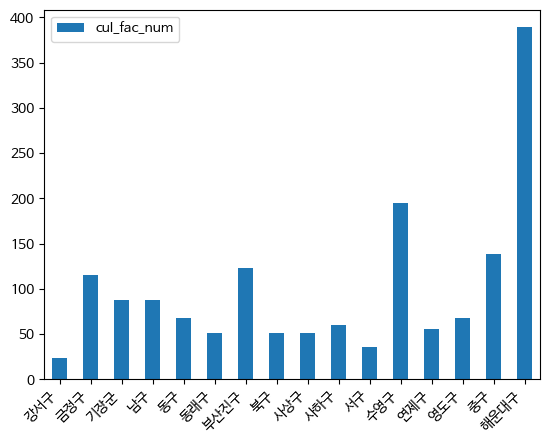

In [14]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['cul_fac_num'].plot(kind='bar')
plt.legend(['cul_fac_num'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [15]:
final_art_facilities_index['mil_fac_num'].describe()

count     16.000000
mean     100.000000
std      107.561611
min       30.764664
25%       40.033071
50%       57.637708
75%      102.467408
max      461.324222
Name: mil_fac_num, dtype: float64

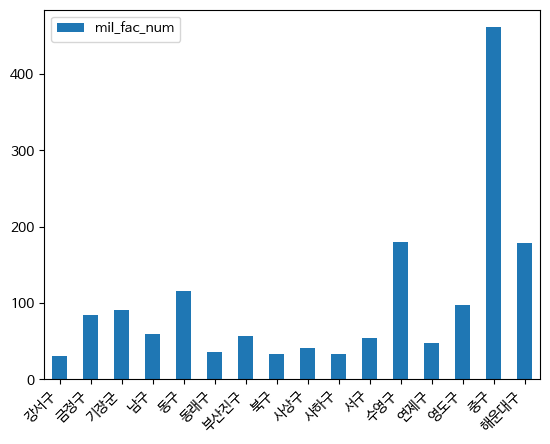

In [16]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['mil_fac_num'].plot(kind='bar')
plt.legend(['mil_fac_num'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [17]:
final_art_facilities_index['hall_num'].describe()

count     16.000000
mean     100.000000
std       89.484004
min       21.052632
25%       42.105263
50%       73.684211
75%      131.578947
max      378.947368
Name: hall_num, dtype: float64

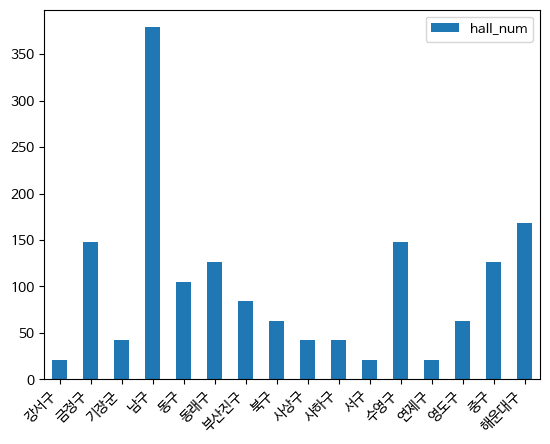

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['hall_num'].plot(kind='bar')
plt.legend(['hall_num'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [19]:
final_art_facilities_index['hall_rate'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: hall_rate, dtype: float64

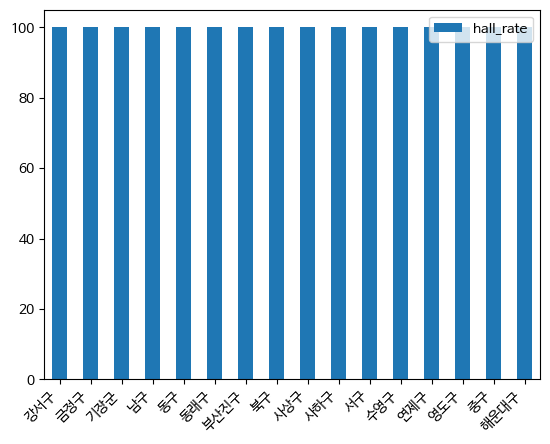

In [20]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['hall_rate'].plot(kind='bar')
plt.legend(['hall_rate'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [21]:
final_art_facilities_index['hall_num_rate'].describe()

count     16.000000
mean     100.000000
std       44.742002
min       60.526316
25%       71.052632
50%       86.842105
75%      115.789474
max      239.473684
Name: hall_num_rate, dtype: float64

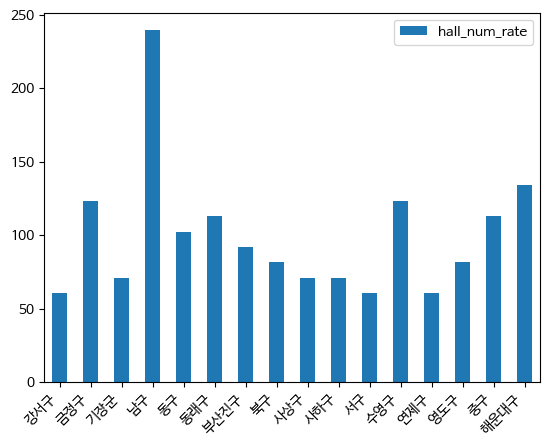

In [22]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['hall_num_rate'].plot(kind='bar')
plt.legend(['hall_num_rate'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [23]:
final_art_facilities_index['facilities_index'].describe()

count     16.000000
mean      99.998125
std       62.454547
min       38.370000
25%       54.807500
50%       82.635000
75%      113.000000
max      237.810000
Name: facilities_index, dtype: float64

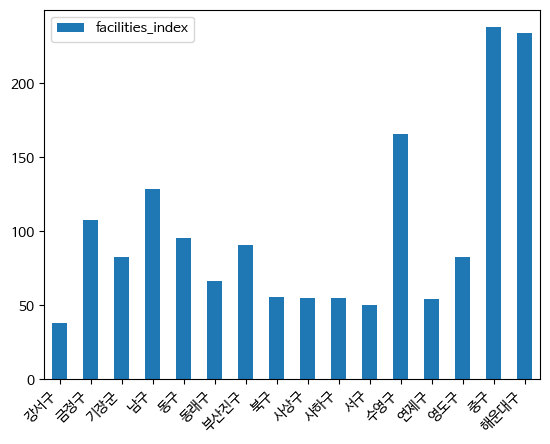

In [24]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['facilities_index'].plot(kind='bar')
plt.legend(['facilities_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [25]:
final_art_facilities_index['facilities_people_index'].describe()

count    16.00
mean     90.77
std       0.00
min      90.77
25%      90.77
50%      90.77
75%      90.77
max      90.77
Name: facilities_people_index, dtype: float64

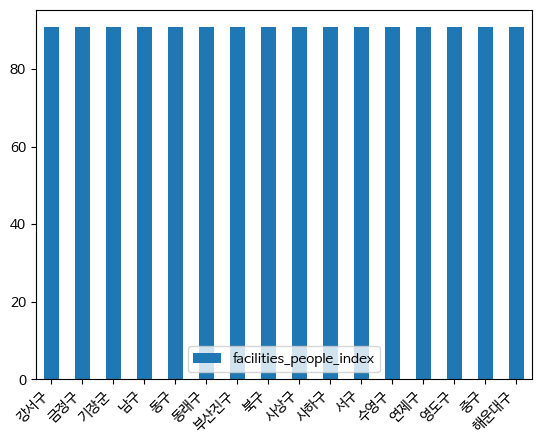

In [26]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['facilities_people_index'].plot(kind='bar')
plt.legend(['facilities_people_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [27]:
final_art_facilities_index['busan_arts_facilities_index'].describe()

count     16.000000
mean      95.383750
std       31.227535
min       64.570000
25%       72.790000
50%       86.700000
75%      101.885000
max      164.290000
Name: busan_arts_facilities_index, dtype: float64

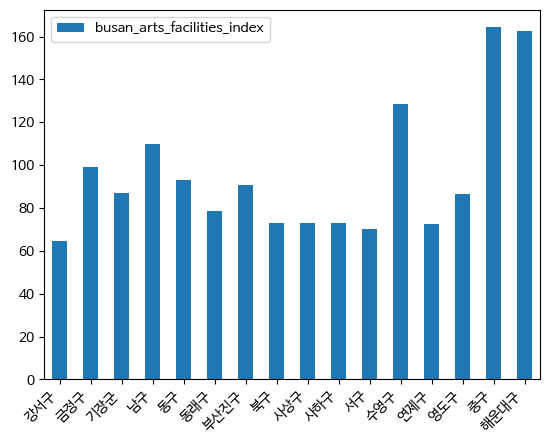

In [28]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

final_art_facilities_index['busan_arts_facilities_index'].plot(kind='bar')
plt.legend(['busan_arts_facilities_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [29]:
final_art_facilities_index.to_csv('busan_arts_facilities_index.csv', encoding='utf-8-sig', index=False)